<a href="https://colab.research.google.com/github/pralaksh/INSE6220/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pycaret==2.3.6

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [16]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/pralaksh/INSE6220/main/Car-10.csv')
df.head(25)

mpg  cylinder  displacement  weight  acceleration  class
0   18.0         8           307    3504          12.0     70
1   15.0         8           350    3693          11.5     70
2   18.0         8           318    3436          11.0     70
3   16.0         8           304    3433          12.0     70
4   17.0         8           302    3449          10.5     70
5   15.0         8           429    4341          10.0     70
6   14.0         8           454    4354           9.0     70
7   14.0         8           440    4312           8.5     70
8   14.0         8           455    4425          10.0     70
9   15.0         8           390    3850           8.5     70
10  15.0         8           383    3563          10.0     70
11  14.0         8           340    3609           8.0     70
12  15.0         8           400    3761           9.5     70
13  14.0         8           455    3086          10.0     70
14  24.0         4           113    2372          15.0     70
15  22.0         6           198    2833          15.5     70
16  18.0         6           199    2774          15.5     70
17  21.0         6           200    2587          16.0     70
18  27.0         4            97    2130          14.5     70
19  26.0         4            97    1835          20.5     70
20  19.0         6           232    3211          17.0     75
21  23.0         4           115    2694          15.0     75
22  23.0         4           120    2957          17.0     75
23  22.0         4           121    2945          14.5     75
24  25.0         4           121    2671          13.5     75

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           160 non-null    float64
 1   cylinder      160 non-null    int64  
 2   displacement  160 non-null    int64  
 3   weight        160 non-null    int64  
 4   acceleration  160 non-null    float64
 5   class         160 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 7.6 KB


In [39]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [40]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


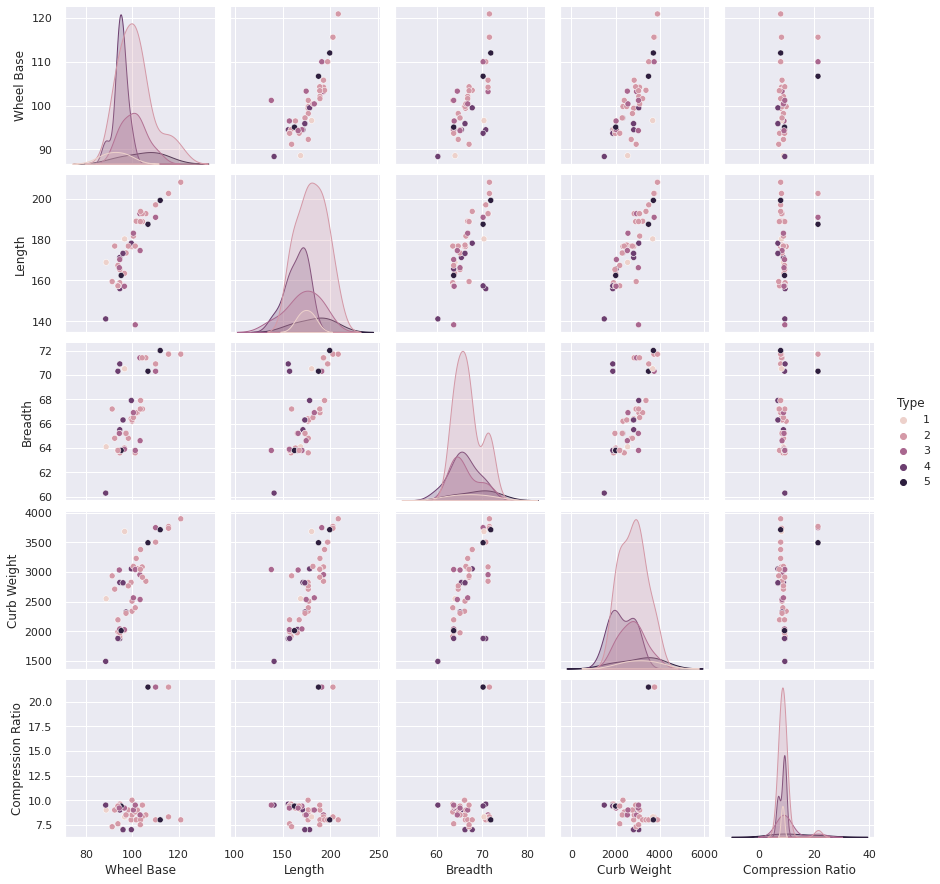

In [392]:
sns.pairplot(df, hue='Type')
plt.show()

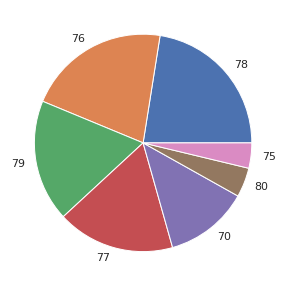

In [41]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [42]:
X = df.drop(columns=['class'])
X.head(10)

mpg  cylinder  displacement  weight  acceleration
0  18.0         8           307    3504          12.0
1  15.0         8           350    3693          11.5
2  18.0         8           318    3436          11.0
3  16.0         8           304    3433          12.0
4  17.0         8           302    3449          10.5
5  15.0         8           429    4341          10.0
6  14.0         8           454    4354           9.0
7  14.0         8           440    4312           8.5
8  14.0         8           455    4425          10.0
9  15.0         8           390    3850           8.5

In [43]:
X.describe().transpose()

count         mean         std     min       25%      50%  \
mpg           160.0    23.165625    6.855233    13.0    17.675    21.55   
cylinder      160.0     5.643750    1.720563     3.0     4.000     6.00   
displacement  160.0   202.018750  103.881492    78.0   105.000   170.50   
weight        160.0  3004.093750  768.622453  1795.0  2227.500  2996.50   
acceleration  160.0    15.336875    2.893185     8.0    13.575    15.35   

                 75%     max  
mpg             28.0    43.1  
cylinder         8.0     8.0  
displacement   302.0   455.0  
weight        3606.0  4425.0  
acceleration    17.0    24.8

In [44]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

mpg  cylinder  displacement    weight  acceleration
0 -0.755896  1.373764      1.013760  0.652435     -1.156978
1 -1.194892  1.373764      1.428992  0.899101     -1.330341
2 -0.755896  1.373764      1.119982  0.563687     -1.503703
3 -1.048560  1.373764      0.984790  0.559771     -1.156978
4 -0.902228  1.373764      0.965477  0.580653     -1.677066
5 -1.194892  1.373764      2.191862  1.744815     -1.850428
6 -1.341224  1.373764      2.433277  1.761781     -2.197153
7 -1.341224  1.373764      2.298084  1.706966     -2.370516
8 -1.341224  1.373764      2.442933  1.854444     -1.850428
9 -1.194892  1.373764      1.815256  1.104004     -2.370516

In [45]:
X.describe().transpose()

count          mean      std       min       25%       50%  \
mpg           160.0  2.520553e-16  1.00314 -1.487556 -0.803454 -0.236418   
cylinder      160.0  1.595946e-16  1.00314 -1.541385 -0.958355  0.207704   
displacement  160.0 -4.024558e-17  1.00314 -1.197597 -0.936869 -0.304363   
weight        160.0 -9.202166e-19  1.00314 -1.578005 -1.013543 -0.009911   
acceleration  160.0 -3.136380e-16  1.00314 -2.543879 -0.610886  0.004551   

                   75%       max  
mpg           0.707424  2.917036  
cylinder      1.373764  1.373764  
displacement  0.965477  2.442933  
weight        0.785556  1.854444  
acceleration  0.576647  3.281103

In [46]:
observations = list(df.index)
variables = list(df.columns)

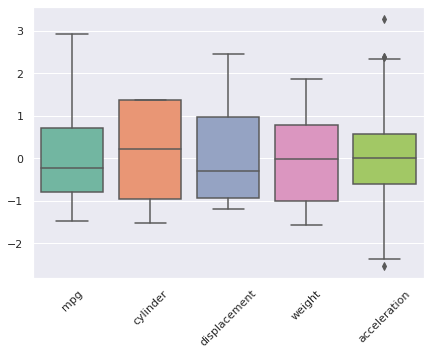

In [47]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

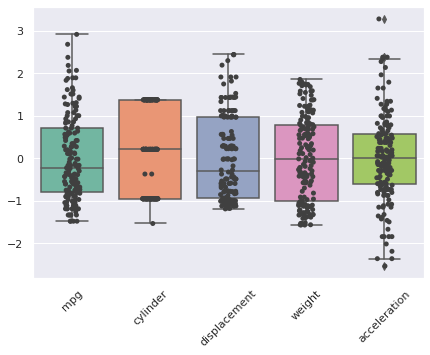

In [48]:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

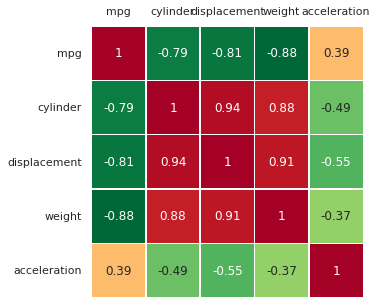

In [49]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

Text(0, 0.5, '$Z_4$')

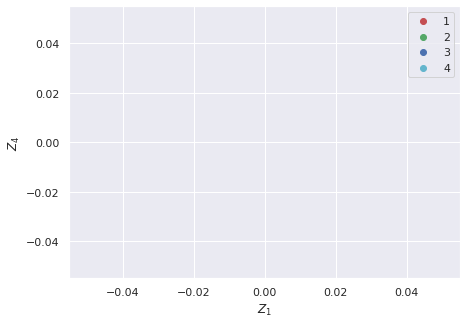

In [50]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_1 = np.where(y == 0)
idx_2 = np.where(y == 1)
idx_3 = np.where(y == 2)
idx_4 = np.where(y == 4)


plt. figure()
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='r', label='1')
plt.scatter(Z[idx_2,0], Z[idx_2,1], c='g', label='2')
plt.scatter(Z[idx_3,0], Z[idx_3,1], c='b', label='3')
plt.scatter(Z[idx_4,0], Z[idx_4,1], c='c', label='4')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.ylabel('$Z_3$')
plt.ylabel('$Z_4$')

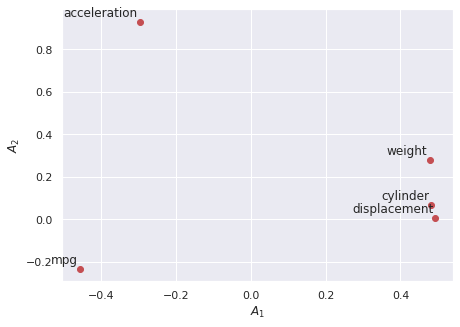

In [51]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


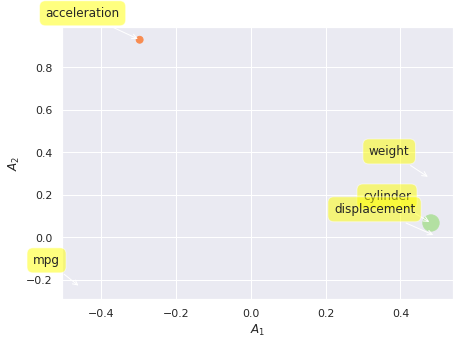

In [52]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Text(0, 0.5, 'Explained variance')

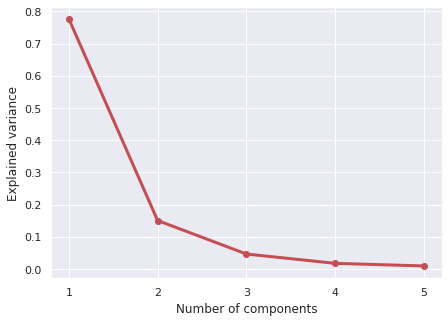

In [53]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Text(0, 0.5, 'Cumulative explained variance')

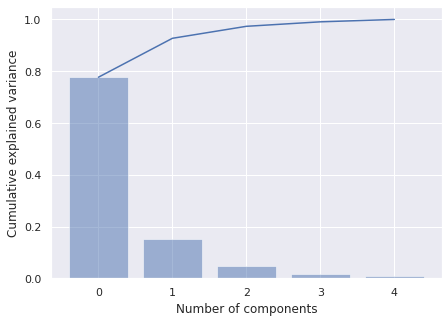

In [54]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [55]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=73b5840a98a2b82416163536ec3b99c04d82e03723ac06275954c2d6d6b3d0de
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [56]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [57]:
out['PC']

PC1       PC2       PC3
0    2.162146 -0.615470  0.261573
1    2.736653 -0.602374  0.029531
2    2.275209 -0.961592  0.244936
3    2.237289 -0.573706  0.030045
4    2.325579 -1.085181  0.050777
..        ...       ...       ...
155 -2.121653 -0.646804  0.218521
156 -2.675404 -0.567856  0.807722
157 -1.350672  0.022334 -0.037082
158 -1.341355  0.661341 -0.172461
159 -1.271965  1.426325 -0.265982

[160 rows x 3 columns]

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5c5e31fa50>)

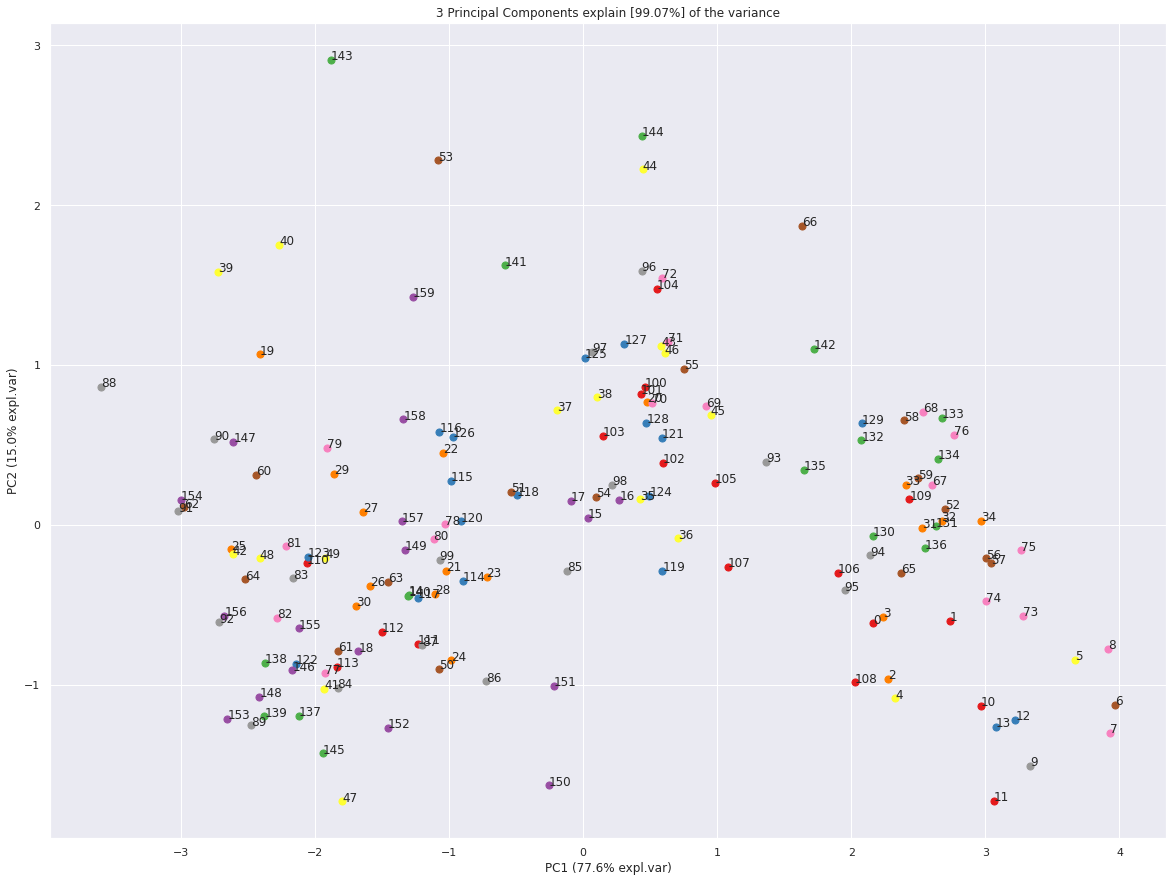

In [58]:
model.scatter(label=True, legend=False)

In [257]:
A = out['loadings'].T

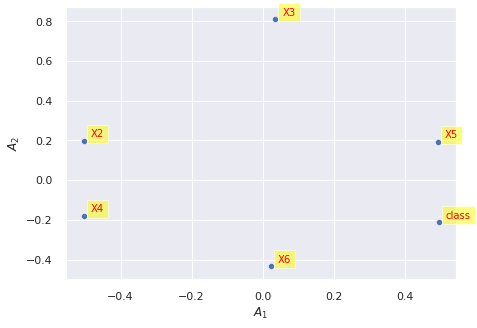

In [258]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

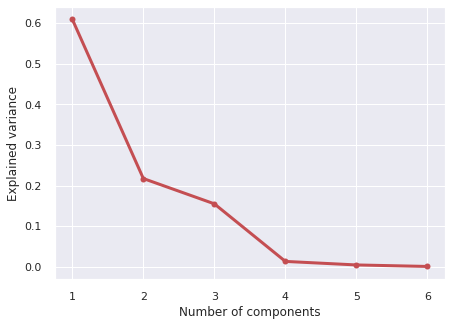

In [259]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

In [59]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [60]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (144, 6)
Unseen Data For Predictions: (16, 6)


In [62]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (144, 6)
5                           Missing Values             False
6                         Numeric Features                 4
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (100, 8)
12                    Transformed Test Set           (44, 8)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              6353
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [63]:
best_model = compare_models()

Model  Accuracy  AUC  Recall   Prec.  \
lr                    Logistic Regression      0.32  0.0  0.3200  0.2413   
ridge                    Ridge Classifier      0.31  0.0  0.3083  0.2450   
lda          Linear Discriminant Analysis      0.30  0.0  0.2894  0.2407   
lightgbm  Light Gradient Boosting Machine      0.30  0.0  0.2940  0.2908   
dt               Decision Tree Classifier      0.29  0.0  0.2482  0.3183   
rf               Random Forest Classifier      0.28  0.0  0.2667  0.2940   
gbc          Gradient Boosting Classifier      0.28  0.0  0.2778  0.2463   
qda       Quadratic Discriminant Analysis      0.26  0.0  0.2350  0.1780   
ada                  Ada Boost Classifier      0.26  0.0  0.2170  0.1685   
et                 Extra Trees Classifier      0.23  0.0  0.2250  0.2207   
svm                   SVM - Linear Kernel      0.20  0.0  0.1743  0.0540   
dummy                    Dummy Classifier      0.20  0.0  0.1767  0.0400   
knn                K Neighbors Classifier      0.18  0.0  0.1966  0.1260   
nb                            Naive Bayes      0.18  0.0  0.1905  0.1327   

              F1   Kappa     MCC  TT (Sec)  
lr        0.2564  0.1599  0.1783     0.891  
ridge     0.2568  0.1429  0.1544     0.017  
lda       0.2533  0.1367  0.1446     0.013  
lightgbm  0.2723  0.1519  0.1592     0.087  
dt        0.2883  0.1438  0.1484     0.023  
rf        0.2677  0.1265  0.1333     0.554  
gbc       0.2481  0.1162  0.1238     0.564  
qda       0.1865  0.0914  0.1218     0.020  
ada       0.1876  0.0696  0.0829     0.154  
et        0.2110  0.0738  0.0789     0.442  
svm       0.0817  0.0149  0.0239     0.080  
dummy     0.0667  0.0000  0.0000     0.011  
knn       0.1375  0.0065  0.0059     0.135  
nb        0.1309  0.0862  0.1070     0.032

In [64]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
dt = create_model('dt')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.3000  0.0  0.3056  0.3500  0.3200  0.1358  0.1375
1       0.1000  0.0  0.0833  0.1000  0.1000 -0.0714 -0.0790
2       0.2000  0.0  0.2000  0.2000  0.2000  0.0000  0.0000
3       0.4000  0.0  0.2857  0.4333  0.3933  0.2857  0.2927
4       0.3000  0.0  0.2500  0.2667  0.2800  0.1463  0.1500
5       0.4000  0.0  0.2857  0.5667  0.4467  0.2857  0.2963
6       0.1000  0.0  0.0714  0.1000  0.1000 -0.0465 -0.0513
7       0.3000  0.0  0.3333  0.2833  0.2500  0.1667  0.1822
8       0.6000  0.0  0.5000  0.6833  0.5933  0.5238  0.5433
9       0.2000  0.0  0.1667  0.2000  0.2000  0.0123  0.0125
Mean    0.2900  0.0  0.2482  0.3183  0.2883  0.1438  0.1484
SD      0.1446  0.0  0.1201  0.1834  0.1477  0.1749  0.1822

In [72]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [73]:
tuned_dt = tune_model(dt)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0         0.30  0.0  0.3667  0.2167  0.2467  0.1139  0.1169
1         0.20  0.0  0.1389  0.1250  0.1524 -0.0256 -0.0279
2         0.30  0.0  0.2500  0.2800  0.2476  0.1463  0.1627
3         0.40  0.0  0.3333  0.2500  0.3000  0.2500  0.2761
4         0.50  0.0  0.4167  0.4333  0.4267  0.3827  0.4034
5         0.50  0.0  0.4167  0.4800  0.4476  0.3750  0.4078
6         0.30  0.0  0.3333  0.1667  0.2100  0.1566  0.1667
7         0.20  0.0  0.2500  0.1500  0.1667  0.0476  0.0488
8         0.50  0.0  0.5000  0.4833  0.4600  0.3902  0.4001
9         0.20  0.0  0.1667  0.2000  0.2000  0.0361  0.0385
Mean      0.34  0.0  0.3172  0.2785  0.2858  0.1873  0.1993
SD        0.12  0.0  0.1094  0.1304  0.1117  0.1464  0.1551

In [74]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [76]:
!pip install statsmodels --upgrade

In [77]:
knn = create_model('knn')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.1000  0.0  0.2000  0.0333  0.0500 -0.0843 -0.1007
1       0.2000  0.0  0.1389  0.1600  0.1750 -0.0127 -0.0139
2       0.2000  0.0  0.1667  0.1167  0.1467  0.0244  0.0264
3       0.2000  0.0  0.2500  0.1500  0.1667  0.0244  0.0247
4       0.3000  0.0  0.2500  0.2000  0.2400  0.1250  0.1301
5       0.1000  0.0  0.0714  0.0667  0.0800 -0.0345 -0.0380
6       0.3000  0.0  0.3056  0.3750  0.2933  0.1566  0.1690
7       0.1000  0.0  0.1667  0.0500  0.0667 -0.0976 -0.1056
8       0.1000  0.0  0.1667  0.0333  0.0500 -0.0843 -0.0887
9       0.2000  0.0  0.2500  0.0750  0.1067  0.0476  0.0552
Mean    0.1800  0.0  0.1966  0.1260  0.1375  0.0065  0.0059
SD      0.0748  0.0  0.0649  0.0992  0.0786  0.0826  0.0896

In [78]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.2000  0.0  0.2667  0.2500  0.2200 -0.0127 -0.0135
1       0.3000  0.0  0.2222  0.3667  0.3133  0.1358  0.1429
2       0.4000  0.0  0.3333  0.4800  0.3810  0.2683  0.2983
3       0.4000  0.0  0.2857  0.3000  0.3400  0.2771  0.2913
4       0.2000  0.0  0.2143  0.1333  0.1500  0.0588  0.0633
5       0.3000  0.0  0.2143  0.2400  0.2571  0.1463  0.1607
6       0.4000  0.0  0.5556  0.3333  0.3500  0.2683  0.2785
7       0.2000  0.0  0.2500  0.1167  0.1467  0.0244  0.0253
8       0.4000  0.0  0.5000  0.2300  0.2810  0.2771  0.3126
9       0.2000  0.0  0.2500  0.1000  0.1333  0.0244  0.0264
Mean    0.3000  0.0  0.3092  0.2550  0.2572  0.1468  0.1586
SD      0.0894  0.0  0.1152  0.1141  0.0866  0.1126  0.1222

In [79]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<Figure size 576x396 with 0 Axes>

In [80]:
lr = create_model('lr')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.3000  0.0  0.3667  0.2500  0.2667  0.1026  0.1068
1       0.4000  0.0  0.3667  0.3667  0.3333  0.2208  0.2619
2       0.3000  0.0  0.3000  0.2900  0.2571  0.1250  0.1468
3       0.4000  0.0  0.3333  0.2500  0.3067  0.2500  0.2719
4       0.4000  0.0  0.3333  0.3167  0.3467  0.2593  0.2772
5       0.4000  0.0  0.3333  0.3400  0.3238  0.2500  0.2900
6       0.2000  0.0  0.2500  0.1000  0.1333  0.0588  0.0668
7       0.2000  0.0  0.2500  0.0833  0.1167  0.0476  0.0528
8       0.5000  0.0  0.5000  0.3667  0.4133  0.3827  0.4092
9       0.1000  0.0  0.1667  0.0500  0.0667 -0.0976 -0.1000
Mean    0.3200  0.0  0.3200  0.2413  0.2564  0.1599  0.1783
SD      0.1166  0.0  0.0843  0.1144  0.1080  0.1316  0.1425

In [81]:
tuned_lr = tune_model(lr)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0         0.30  0.0  0.3667  0.2500  0.2667  0.1026  0.1068
1         0.40  0.0  0.3667  0.3667  0.3333  0.2208  0.2619
2         0.30  0.0  0.3000  0.2900  0.2571  0.1250  0.1468
3         0.40  0.0  0.3333  0.2500  0.3067  0.2500  0.2719
4         0.40  0.0  0.3333  0.3167  0.3467  0.2593  0.2772
5         0.40  0.0  0.3333  0.3400  0.3238  0.2500  0.2900
6         0.30  0.0  0.3333  0.2000  0.2333  0.1667  0.1845
7         0.20  0.0  0.2500  0.0833  0.1167  0.0476  0.0528
8         0.50  0.0  0.5000  0.3667  0.4133  0.3827  0.4092
9         0.10  0.0  0.1667  0.0500  0.0667 -0.0976 -0.1000
Mean      0.33  0.0  0.3283  0.2513  0.2664  0.1707  0.1901
SD        0.11  0.0  0.0810  0.1057  0.1005  0.1272  0.1376

In [82]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [83]:
rf = create_model('rf')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.2000  0.0  0.2500  0.1167  0.1467  0.0244  0.0253
1       0.0000  0.0  0.0000  0.0000  0.0000 -0.2346 -0.2436
2       0.2000  0.0  0.1667  0.2667  0.2133  0.0244  0.0250
3       0.4000  0.0  0.2857  0.3000  0.3400  0.2771  0.2913
4       0.5000  0.0  0.4167  0.6500  0.5333  0.3902  0.4108
5       0.2000  0.0  0.1667  0.4000  0.2667  0.0476  0.0521
6       0.2000  0.0  0.2143  0.1167  0.1467  0.0588  0.0641
7       0.3000  0.0  0.3333  0.2900  0.2571  0.1463  0.1631
8       0.6000  0.0  0.5833  0.6000  0.5733  0.5062  0.5194
9       0.2000  0.0  0.2500  0.2000  0.2000  0.0244  0.0257
Mean    0.2800  0.0  0.2667  0.2940  0.2677  0.1265  0.1333
SD      0.1661  0.0  0.1490  0.1976  0.1667  0.2023  0.2098

In [84]:
tuned_rf = tune_model(rf)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.3000  0.0  0.3667  0.2250  0.2524  0.1026  0.1068
1       0.3000  0.0  0.3667  0.2417  0.2657  0.0909  0.0947
2       0.3000  0.0  0.2500  0.2667  0.2333  0.1463  0.1732
3       0.4000  0.0  0.3333  0.2667  0.3133  0.2500  0.2640
4       0.5000  0.0  0.4167  0.4133  0.4076  0.3750  0.4141
5       0.6000  0.0  0.5000  0.5333  0.5267  0.5000  0.5280
6       0.3000  0.0  0.3333  0.1667  0.2100  0.1566  0.1667
7       0.3000  0.0  0.3333  0.1667  0.2133  0.1463  0.1584
8       0.5000  0.0  0.5000  0.4833  0.4600  0.3902  0.4001
9       0.2000  0.0  0.1667  0.1667  0.1800  0.0244  0.0257
Mean    0.3700  0.0  0.3567  0.2930  0.3062  0.2182  0.2332
SD      0.1187  0.0  0.0970  0.1284  0.1124  0.1469  0.1550

In [85]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [86]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0         0.30  0.0  0.3667  0.2500  0.2667  0.1026  0.1068
1         0.40  0.0  0.3667  0.3667  0.3333  0.2208  0.2619
2         0.30  0.0  0.3000  0.2900  0.2571  0.1250  0.1468
3         0.40  0.0  0.3333  0.2500  0.3067  0.2500  0.2719
4         0.40  0.0  0.3333  0.3167  0.3467  0.2593  0.2772
5         0.40  0.0  0.3333  0.3400  0.3238  0.2500  0.2900
6         0.30  0.0  0.3333  0.2000  0.2333  0.1667  0.1845
7         0.20  0.0  0.2500  0.0833  0.1167  0.0476  0.0528
8         0.50  0.0  0.5000  0.3667  0.4133  0.3827  0.4092
9         0.10  0.0  0.1667  0.0500  0.0667 -0.0976 -0.1000
Mean      0.33  0.0  0.3283  0.2513  0.2664  0.1707  0.1901
SD        0.11  0.0  0.0810  0.1057  0.1005  0.1272  0.1376

In [87]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [88]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (144, 6)
5                           Missing Values             False
6                         Numeric Features                 4
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (100, 3)
12                    Transformed Test Set           (44, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              4821
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [89]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy  AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier      0.34  0.0  0.3379  0.3317   
lr                    Logistic Regression      0.32  0.0  0.3156  0.2700   
lda          Linear Discriminant Analysis      0.32  0.0  0.3156  0.2880   
knn                K Neighbors Classifier      0.31  0.0  0.2987  0.2342   
qda       Quadratic Discriminant Analysis      0.31  0.0  0.2813  0.2327   
svm                   SVM - Linear Kernel      0.30  0.0  0.2887  0.2333   
ridge                    Ridge Classifier      0.30  0.0  0.2989  0.2447   
rf               Random Forest Classifier      0.30  0.0  0.2817  0.2850   
lightgbm  Light Gradient Boosting Machine      0.29  0.0  0.2737  0.2478   
et                 Extra Trees Classifier      0.28  0.0  0.2634  0.2842   
dt               Decision Tree Classifier      0.27  0.0  0.2698  0.2113   
nb                            Naive Bayes      0.26  0.0  0.2329  0.2622   
ada                  Ada Boost Classifier      0.25  0.0  0.2217  0.1305   
dummy                    Dummy Classifier      0.20  0.0  0.1767  0.0400   

              F1   Kappa     MCC  TT (Sec)  
gbc       0.3150  0.1991  0.2083     0.709  
lr        0.2625  0.1504  0.1680     0.035  
lda       0.2672  0.1542  0.1724     0.019  
knn       0.2509  0.1554  0.1682     0.134  
qda       0.2491  0.1451  0.1610     0.025  
svm       0.2400  0.1340  0.1514     0.080  
ridge     0.2332  0.1316  0.1503     0.020  
rf        0.2737  0.1357  0.1421     0.565  
lightgbm  0.2537  0.1275  0.1330     0.146  
et        0.2583  0.1211  0.1284     0.514  
dt        0.2244  0.1077  0.1137     0.022  
nb        0.2427  0.1122  0.1212     0.025  
ada       0.1672  0.0516  0.0532     0.158  
dummy     0.0667  0.0000  0.0000     0.020

In [90]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.3000  0.0  0.3333  0.1833  0.2267  0.1566  0.1688
1       0.1000  0.0  0.1000  0.0500  0.0667 -0.1688 -0.1812
2       0.2000  0.0  0.1667  0.2500  0.2000  0.0244  0.0256
3       0.7000  0.0  0.5000  0.6667  0.6533  0.6341  0.6587
4       0.3000  0.0  0.2500  0.2000  0.2400  0.1566  0.1692
5       0.6000  0.0  0.5000  0.6000  0.5733  0.5062  0.5194
6       0.2000  0.0  0.2500  0.1500  0.1667  0.0244  0.0260
7       0.3000  0.0  0.3333  0.2000  0.2300  0.1566  0.1647
8       0.2000  0.0  0.3333  0.1500  0.1667  0.0361  0.0370
9       0.4000  0.0  0.4167  0.4500  0.4000  0.2593  0.2696
Mean    0.3300  0.0  0.3183  0.2900  0.2923  0.1786  0.1858
SD      0.1792  0.0  0.1250  0.1974  0.1797  0.2261  0.2347

In [91]:
tuned_best_model_pca

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [92]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [93]:
!pip install shap

     |████████████████████████████████| 564 kB 8.2 MB/s 


In [94]:
rf_pca = create_model('rf')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.3000  0.0  0.3333  0.1667  0.2133  0.1667  0.1895
1       0.0000  0.0  0.0000  0.0000  0.0000 -0.3158 -0.3397
2       0.1000  0.0  0.0833  0.2000  0.1333 -0.0976 -0.1026
3       0.6000  0.0  0.4286  0.5667  0.5533  0.5122  0.5320
4       0.4000  0.0  0.3333  0.5333  0.4267  0.2683  0.2787
5       0.3000  0.0  0.2500  0.3500  0.3000  0.1358  0.1412
6       0.3000  0.0  0.3056  0.3000  0.2867  0.1358  0.1393
7       0.3000  0.0  0.3333  0.1833  0.2167  0.1566  0.1716
8       0.4000  0.0  0.4167  0.3333  0.3600  0.2593  0.2660
9       0.3000  0.0  0.3333  0.2167  0.2467  0.1358  0.1452
Mean    0.3000  0.0  0.2817  0.2850  0.2737  0.1357  0.1421
SD      0.1549  0.0  0.1307  0.1629  0.1457  0.2084  0.2194

In [95]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0        0.200  0.0  0.2222  0.2000  0.2000  0.0244  0.0260
1        0.200  0.0  0.2000  0.0667  0.1000 -0.0526 -0.0654
2        0.200  0.0  0.2000  0.1167  0.1467  0.0000  0.0000
3        0.400  0.0  0.3333  0.2000  0.2600  0.2500  0.3006
4        0.300  0.0  0.2500  0.2333  0.2600  0.1358  0.1375
5        0.400  0.0  0.3333  0.5000  0.4333  0.2771  0.2876
6        0.200  0.0  0.2222  0.1500  0.1667  0.0000  0.0000
7        0.100  0.0  0.1667  0.0333  0.0500 -0.0714 -0.0760
8        0.400  0.0  0.4167  0.2467  0.2943  0.2593  0.2899
9        0.200  0.0  0.2500  0.1400  0.1571  0.0123  0.0138
Mean     0.260  0.0  0.2594  0.1887  0.2068  0.0835  0.0914
SD       0.102  0.0  0.0737  0.1227  0.1041  0.1280  0.1426

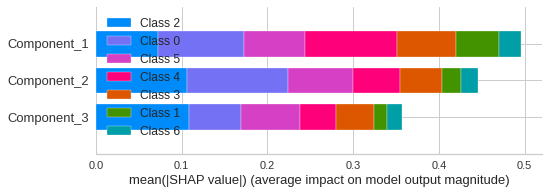

In [96]:
interpret_model(tuned_rf_pca, plot='summary')

In [97]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

In [98]:
interpret_model(tuned_rf_pca, plot='reason')